In [14]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt

In [20]:
#open the nifti file from ../../DataBase/DataSEt_Preprocessed/Sub-oo104.nii.gz
img = nib.load('../../DataBase/DataSet_Preprocessed/SUB-00104.nii.gz')
#show shape of image
print(img.shape)

(240, 240, 155)


(240, 240)


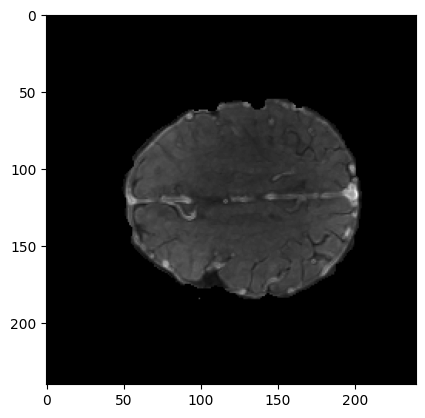

In [21]:
# get the first volume of the image
vol = img.get_fdata()[:, :, 100]
#show the shape of the first volume
print(vol.shape)

plt.imshow(vol, cmap='gray')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.4836063385009766].


(240, 240, 3)


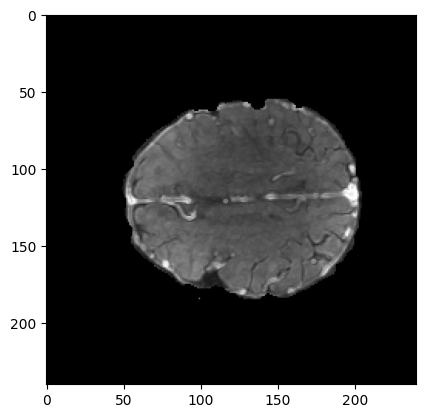

In [23]:
# convert the vol image to have rgb channels
vol_rgb = np.stack((vol,) * 3, axis=-1)
print(vol_rgb.shape)
plt.imshow(vol_rgb, cmap='gray')
plt.show()
